In [10]:
#주성분 분석 - PCA
from sklearn.decomposition import PCA
#데이터 표준화
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [11]:
#데이터 작성
X = np.array([[50,73], [65,75], [75,80], [80, 82], [95,85]])
print(X)

[[50 73]
 [65 75]
 [75 80]
 [80 82]
 [95 85]]


(0.0, 100.0)

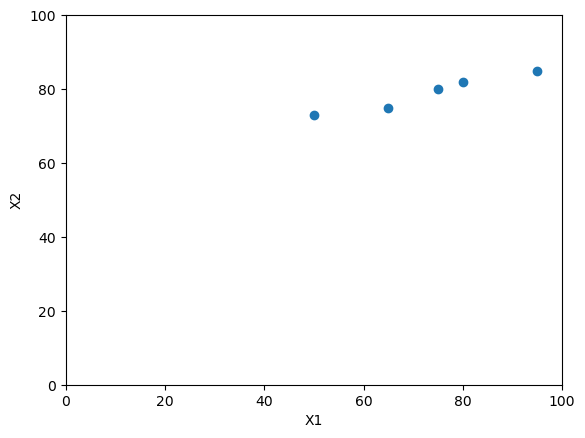

In [12]:
#원데이터 1열과 2열의 산포도
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(0,100)
plt.ylim(0,100)

In [23]:
#열 별 평균
print(np.mean(X, axis=0))
#열별 분산
print(np.var(X, axis=0))

[73. 79.]
[226.   19.6]


In [25]:
#피쳐 스케일링 
#데이터 표준화 
scalerX = StandardScaler()
scalerX.fit(X)
X_std = scalerX.transform(X)

#데이터 프레임으로 변환 및 열 이름 설정
print(X_std)

[[-1.52993724 -1.35526185]
 [-0.53215208 -0.9035079 ]
 [ 0.13303802  0.22587698]
 [ 0.46563307  0.67763093]
 [ 1.46341823  1.35526185]]


(-3.0, 3.0)

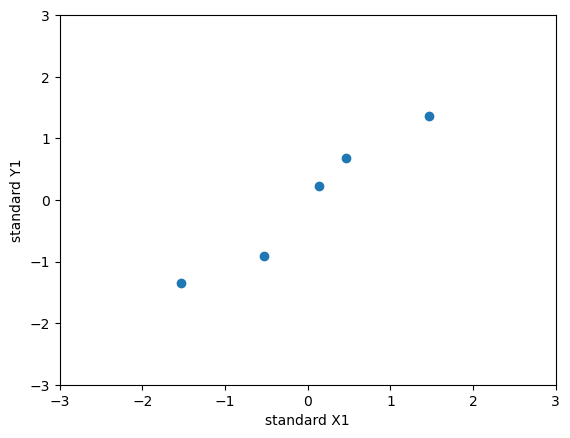

In [29]:
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel('standard X1')
plt.ylabel('standard Y1')

plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [33]:
#열별 평균
print(np.mean(X_std, axis=0))

#모공분산행렬
print(np.cov(X_std[:,0], X_std[:,1], ddof=0))

[0.0000000e+00 4.4408921e-17]
[[1.         0.97663234]
 [0.97663234 1.        ]]


In [37]:
# 주성분분석 -> 주 성분의 수를 설정하기
pca = PCA(n_components = 2)

pca.fit(X_std)


PCA(n_components=2)

In [39]:
# 주성분 추출 
print(pca.explained_variance_)

# 주성분 분산 비율
print(pca.explained_variance_ratio_)

[2.47079043 0.02920957]
[0.98831617 0.01168383]


In [43]:
# 주성분 데이터로의 변환
Z = pca.fit_transform(X_std)
Z

array([[-2.04014385, -0.12351415],
       [-1.01516491,  0.26258822],
       [ 0.25379123, -0.06564705],
       [ 0.80840973, -0.14990512],
       [ 1.9931078 ,  0.07647811]])

(-2.5, 2.5)

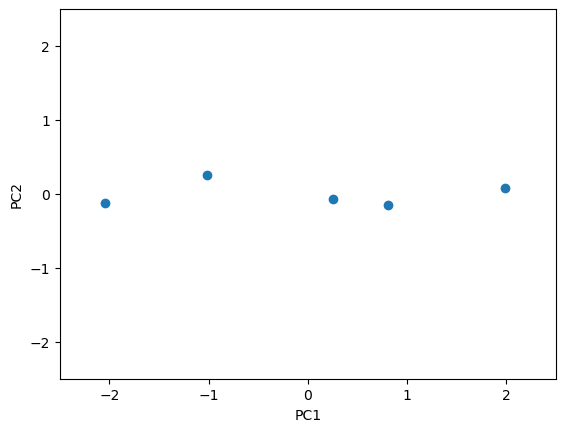

In [47]:
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

In [53]:
#시각화와 해석
# 주성분 로딩을 출력하여 주성분에 기여하는 기존변수들의 영향도를 파악한다
loadings = pca.components_
print(loadings)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


C:\Users\heimi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\heimi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\heimi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\heimi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\heimi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46377 (\N{HANGUL SYLLABLE DING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

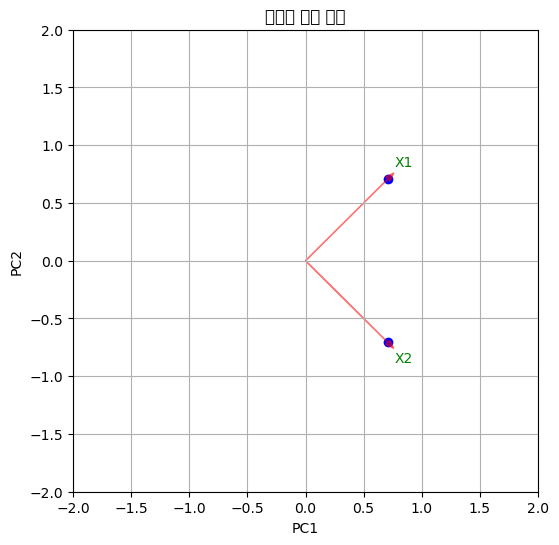

In [61]:
# 주성분 로딩 시각화
plt.figure(figsize=(6,6))
plt.scatter(loadings[:,0], loadings[:,1], color='b')  # 점을 파란색으로 바꿈
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)

# 행과 열의 수
rows, columns = loadings.shape
# 행 이름
row_names = ['X1', 'X2']  # 변수명 수정

for i in range(rows):
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i,0]*1.2, loadings[i,1]*1.2, row_names[i], color='g', ha='center', va='center')

plt.title("주성분 로딩 분포")
plt.show()

### 후기
- 결과 그래프가 책이랑 다르게 나왔다
- 왜 그런지 알아봐야겠다 ^^ ㅎㅎ.. 